In [25]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [26]:
data=pd.read_excel("C:/Users/suraj/Desktop/ExcelR/Assignment 7 clustering/EastWestAirlines.xlsx" , sheet_name="data")

In [27]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [28]:
data.shape

(3999, 12)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [32]:
data.duplicated().sum()

0

In [34]:
data1=data.drop(["ID#"],axis=1)

In [36]:
data1_norm=StandardScaler().fit_transform(data1)

In [38]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data1_norm)
    wcss.append(kmeans.inertia_)

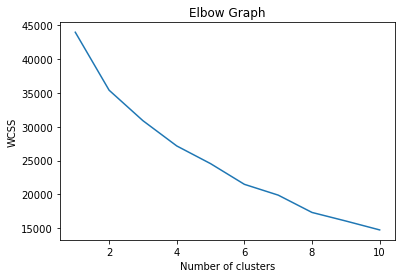

In [40]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
clusters=KMeans(4,random_state=50).fit(data1_norm)
clusters

KMeans(n_clusters=4, random_state=50)

In [44]:
clusters.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
data2=data1.copy()
data2['c']=clusters.labels_
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [48]:
clusters.cluster_centers_

array([[-0.29144814, -0.06122608, -0.6030937 ,  0.03135859, -0.06076638,
        -0.51234162, -0.4830567 , -0.18474694, -0.19703006, -0.20170683,
        -0.3480619 ],
       [ 0.43146227,  0.01856302,  1.20071009, -0.08215256, -0.05465491,
         0.92372488,  0.75162663, -0.0787315 , -0.09036167,  0.36996708,
         0.5857655 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614]])

In [50]:
data2.groupby('c').agg(['mean']).reset_index()

,c,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,44170.677747,96.903402,1.226437,1.019163,1.000391,4749.232303,6.951115,201.699257,0.626907,3700.879937,0.202581
1,1,116974.855564,157.973954,3.710339,1.002368,1.001579,39389.084451,18.806630,348.764009,1.028414,4881.149961,0.651144
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500


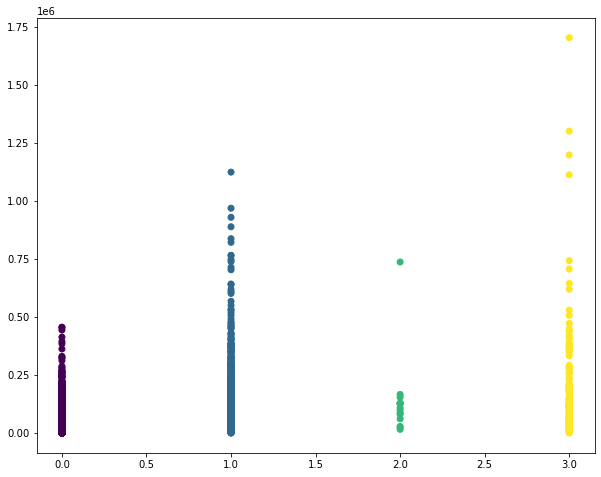

In [53]:
plt.figure(figsize=(10, 8))  
plt.scatter(data2['c'],data2['Balance'], c=clusters.labels_) 

In [55]:
clusters1=KMeans(5,random_state=40).fit(data1_norm)
clusters1

KMeans(n_clusters=5, random_state=40)

In [57]:
clusters1.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [59]:
data3=data1.copy()
data3['c1']=clusters1.labels_
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,c1
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [61]:
clusters1.cluster_centers_

array([[-0.29206039, -0.1294265 , -0.5937465 , -0.09824189, -0.06073705,
        -0.51289713, -0.48587711, -0.17961436, -0.19335571, -0.1959542 ,
        -0.34438313],
       [ 0.4448229 , -0.11171919,  1.21644262, -0.09824189,  0.13584492,
         0.96781528,  0.77337009, -0.07131031, -0.0791225 ,  0.3755843 ,
         0.5812996 ],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.38731797],
       [ 1.2075383 ,  0.45941619,  0.18068372, -0.09824189, -0.06276658,
         0.72843545,  1.79223467,  3.8791192 ,  4.15383077,  0.27876417,
         0.9302332 ]])

In [63]:
data3.groupby('c1').agg(['mean']).reset_index()

,c1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,44172.428288,43.994453,1.242076,1.000000,1.000396,4759.433043,6.936212,208.589540,0.640254,3713.938193,0.204041
1,1,118423.046042,57.692246,3.734249,1.000000,1.038772,40515.599354,19.028271,360.218901,1.073506,4894.094507,0.651050
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
4,4,195276.586466,499.503759,2.308271,1.000000,1.000000,34735.067669,28.812030,5890.954887,17.127820,4694.172932,0.819549


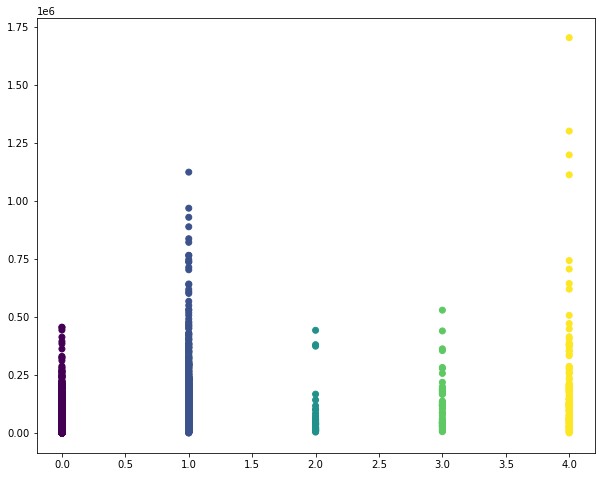

In [66]:
plt.figure(figsize=(10, 8))  
plt.scatter(data3['c1'],data3['Balance'], c=clusters1.labels_) 

In [69]:
data3["c1"].value_counts().sort_index()

0    2524
1    1238
2      43
3      61
4     133
Name: c1, dtype: int64